### Line Plot of Preliminary Data, trying to express the (1) reason deficiency (2) generality (3) locality problem all in one

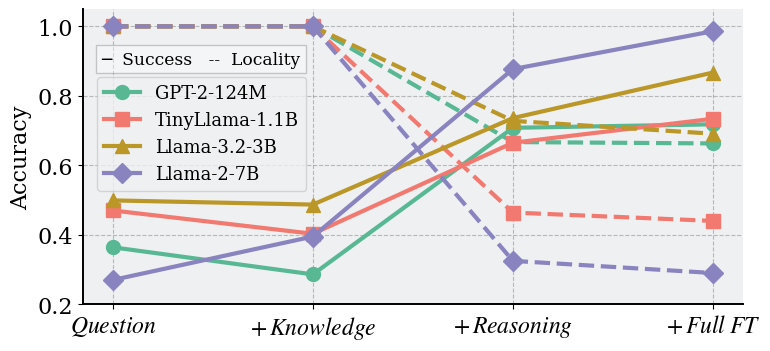

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

# ---- Styling ------------------------------------------------------------
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16


# ---- Data (first four = success, last four = locality) ------------------
raw = [
    [0.364, 0.286, 0.708, 0.718],   # success  GPT-2-125M
    [0.470, 0.403, 0.665, 0.734],
    [0.499, 0.487, 0.736, 0.867],
    [0.270, 0.395, 0.877, 0.986],
    [1.000, 1.000, 0.667, 0.663],   # locality GPT-2-125M
    [1.000, 1.000, 0.464, 0.440],
    [1.000, 1.000, 0.728, 0.691],
    [1.000, 1.000, 0.325, 0.290],
]
succ, loc = raw[:4], raw[4:]

model_names = ['GPT-2-124M', 'TinyLlama-1.1B',
               'Llama-3.2-3B', 'Llama-2-7B']
cot_ids  = ['Question', '+ Knowledge', '+ Reasoning', '+ Full FT']
cot_ids = [
    r'$\mathit{Question}$',           # italic
    r'$\mathit{+\,Knowledge}$',       # italic
    r'$\mathit{+\,Reasoning}$',       # italic
    r'$\mathit{+\,Full\;FT}$'         # bold
]
x        = np.arange(len(cot_ids))

# ---- Plotting -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 4))


colors = [(87/255.0, 184/255.0, 147/255.0), '#F27970', '#BB9727', '#8983BF']  # blue, orange, green, red
markers = ['o', 's', '^', 'D']  # different dot shapes for models

for m, model in enumerate(model_names):
    # Success (solid)
    ax.plot(x, succ[m], label=model,
            color=colors[m], marker=markers[m], linestyle='-',
            linewidth=3, markersize=10)
    
    # Locality (dashed) -- no extra legend entry
    ax.plot(x, loc[m], color=colors[m], marker=markers[m],
            linestyle='--', linewidth=3, markersize=10, label="_nolegend_")

# axes settings
ax.set_ylim(0.2, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(cot_ids, rotation=0, fontsize=17)
ax.set_ylabel('Accuracy', fontsize=16)
# ax.set_title('Success vs. Locality across Editing Settings')

# Main legend (models only)
ax.legend(loc='upper center', bbox_to_anchor=(0.18, 0.8),
          ncol=1, frameon=True, fontsize=13)

# Inline annotation for metric line styles
ax.text(0.028, 0.83, '─  Success   --  Locality',
        transform=ax.transAxes, fontsize=12.3,
        verticalalignment='center', bbox=dict(facecolor='white', alpha=0.4, edgecolor='gray'))

# border line removal (up)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# left and bottom lines
ax.spines['left'].set_linewidth(1.4)
ax.spines['bottom'].set_linewidth(1.4)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('figures/line_preliminary.pdf',
            dpi=600, bbox_inches='tight')

### Bar plot comparing the fact-checking performance and reasoning performance

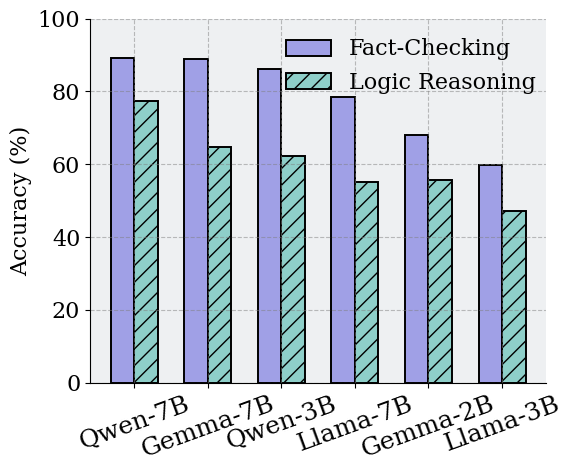

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm, rcParams

# ---- Styling ------------------------------------------------------------
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ----------------------- pseudo numbers for 6 LLMs -----------------------
data = {
    "Model": ["Llama-7B", "Llama-3B", "Gemma-7B", "Gemma-2B", "Qwen-7B", "Qwen-3B"],
    "Fact-checking (%)": [78.4, 59.8, 88.8, 67.9, 89.2, 86.2],
    "Reasoning (%)":     [55.0, 47.2, 64.8, 55.8, 77.3, 62.2],
}
df = pd.DataFrame(data)

# -------- sort left→right by fact-checking performance (high → low) ------
df = df.sort_values("Fact-checking (%)", ascending=False).reset_index(drop=True)

# ----------------------- grouped bar plot --------------------------------
x = np.arange(len(df))
bar_w = 0.32

fig, ax = plt.subplots(figsize=(6, 5))

ax.bar(x - bar_w/2, df["Fact-checking (%)"], bar_w,
       color=(160/255, 160/255, 230/255), edgecolor='black', linewidth=1.4,
       label="Fact-Checking")

ax.bar(x + bar_w/2, df["Reasoning (%)"], bar_w,
       color=(142/255, 207/255, 201/255), edgecolor='black', linewidth=1.4,
       hatch='//', label="Logic Reasoning")

# —— cosmetics ——
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=20, ha="center", fontsize=18)
ax.set_facecolor("#EEF0F2")
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.savefig('/scratch/vjd5zr/project/ReasonEdit/results/figures/fact_reason.pdf', dpi=600, bbox_inches='tight')

### scatter plot of generality v.s. locality

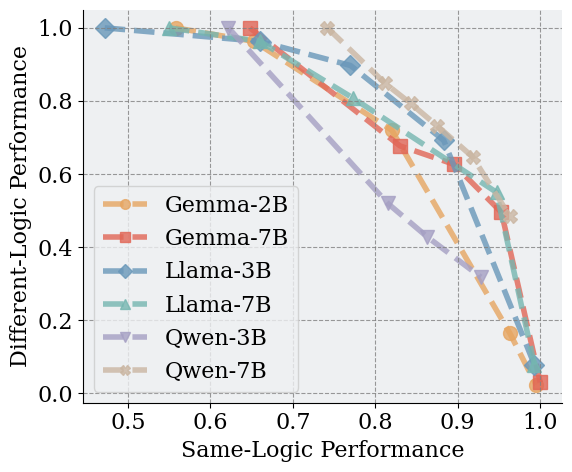

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# --------------- results -----------------------------------------------
runs = {
    # "Gemma-2B": [(0.530, 1), (0.628, 0.838),
    #              (0.838, 0.456), (0.973, 0.112), (0.998, 0.004)],
    "Gemma-2B": [ (0.653, 0.963), (0.995, 0.023), (0.558, 1), (0.963, 0.165), (0.820, 0.720),],
    # "Gemma-7B": [(0.603, 1), (0.879, 0.708), (0.967, 0.407),
    #              (0.996, 0.090)],
    "Gemma-7B": [(0.953, 0.495), (1.000, 0.03), (0.895, 0.627), (0.648, 1), (0.830, 0.677)],
    # "Llama-3B": [(0.231, 1), (0.325, 0.947), (0.554, 0.808),
    #              (0.855, 0.436), (0.996, 0.008)],
    "Llama-3B": [(0.993, 0.078), (0.472,1), (0.770, 0.897), (0.883, 0.692), (0.660, 0.963)],
    # "Llama-7B": [(0.483, 1), (0.734, 0.902),
    #              (0.883, 0.456), (1.000, 0.010)],
    "Llama-7B": [(0.947, 0.550), (0.660, 0.963), (0.993, 0.078), (0.773, 0.808), (0.550, 1)],
    # "Qwen-3B": [(0.548, 1), (0.661, 0.935), (0.718, 0.843), (0.930, 0.219), (0.830, 0.509)],
    "Qwen-3B": [(0.928, 0.318), (0.622, 1), (0.815, 0.520), (0.863, 0.428)],
    # "Qwen-7B": [(0.583, 1), (0.867, 0.493), (0.644, 0.973), (0.957, 0.002)]
    "Qwen-7B": [(0.812, 0.848), (0.963, 0.485), (0.742, 1), (0.843, 0.793), (0.875, 0.732), (0.918, 0.647)],
}

# ---------- bar-chart palette reused here -------------------------------
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255)   # beige
]

offset = (-0.1, -0.1, -0.1)

markers = ["o", "s", "D", "^", "v", "X"]

fig, ax = plt.subplots(figsize=(6, 5))

for (model, points), color, marker in zip(runs.items(), palette, markers):
    # --- optionally impose an ordering (here: ascending x) -------------
    xs, ys = zip(*sorted(points, key=lambda p: p[0]))  # drop “sorted” if not desired
    # line (drawn first so markers sit on top)
    color_offset = [c + off for c, off in zip(color, offset)]
    ax.plot(xs, ys,
            linewidth=4,           # slightly thicker than default
            color=color_offset,
            linestyle='--',  # solid line
            marker=marker, markersize=10,
            label=model, alpha=0.8,
            zorder=1)                # keeps it behind the scatter dots

    # scatter markers
    # ax.scatter(xs, ys,
    #            s=100, marker=marker,
    #            facecolor=color, edgecolor="black", linewidth=1.8,
    #            label=model, alpha=0.5,
            #    zorder=2)

# ---------- cosmetics ----------------------------------------------------
ax.set_xlabel("Same-Logic Performance")
ax.set_ylabel("Different-Logic Performance")
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.8)
ax.spines[['top', 'right']].set_visible(False)
ax.legend(frameon=True, markerscale=0.7)
plt.tight_layout()
plt.savefig("/scratch/vjd5zr/project/ReasonEdit/results/figures/trade_off.pdf", dpi=600, bbox_inches="tight")

### Preliminary Motivation

#### All x-y

✓ Saved scatter → ../../../results/output/attr_scores/qwen2_5_3b_instruct/10/scatter.png


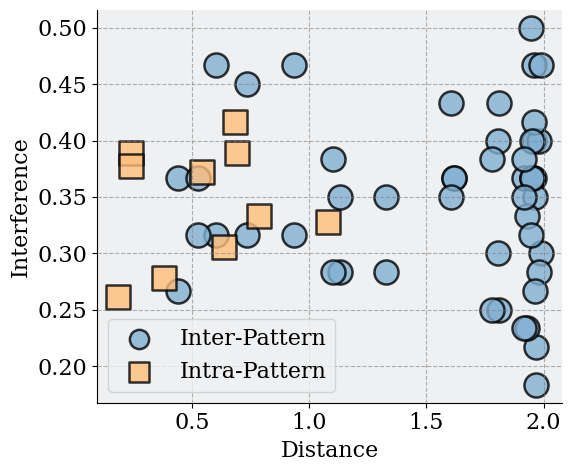

In [2]:
# scatter_plot_styled.py  ────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── 1. 读取两份矩阵 CSV (行列索引必须一致) ────────────────────────────
path_y = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/delta.csv")                   # X 轴
path_x = Path("../../../results/output/attr_scores/qwen2_5_3b_instruct/10/weighted_edit_distance_raw.csv") # Y 轴

mx = pd.read_csv(path_x, index_col=0)
my = pd.read_csv(path_y, index_col=0)
my = my.loc[mx.index, mx.columns]                               # 行列对齐

vals_x = mx.values.flatten()
vals_y = my.values.flatten()

# ── 2. 颜色、标记与样式（复用 bar-chart palette） ────────────────────
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]
markers = ["o", "s"]            # off-diag → 圆点；diag → 方块

label0 = {0, 1, 3, 4, 8}                 # indices with label 0
labels = np.array([0 if i in label0 else 1 for i in range(len(mx))])

# ── 1.  Build boolean masks  ────────────────────────────────────────────
off_diag_mask   = ~np.eye(len(mx), dtype=bool)
diff_label_mask = labels[:, None] != labels[None, :]
# diff_label_mask = np.zeros_like(diff_label_mask, dtype=bool)
# diff_label_mask[1] = 2
nonzero_mask    = (vals_x != 0) & (vals_y != 0)        # <── new line
plot_mask = (off_diag_mask & diff_label_mask).flatten() & nonzero_mask
diag_mask  = (~off_diag_mask).flatten()          # unchanged

# ── 2.  Scatter plot  ───────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 5))

# off-diagonal *and* different-label pairs
ax.scatter(vals_x[plot_mask], vals_y[plot_mask],
           s=300, marker="o",
           facecolor=palette[2], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Inter-Pattern")

ax.scatter(vals_x[diag_mask], vals_y[diag_mask],
           s=300, marker="s",
           facecolor=palette[0], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Intra-Pattern")

# ── 4. 统一风格（与柱状图相同） ──────────────────────────────────────
ax.set_xlabel("Distance")
ax.set_ylabel("Interference")
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=True, markerscale=0.8)
plt.tight_layout()

out = path_x.parent / "scatter.png"
plt.savefig(out, dpi=600, bbox_inches="tight")
print("✓ Saved scatter →", out)

#### average by row

✓ Saved scatter → /scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/scatter.png


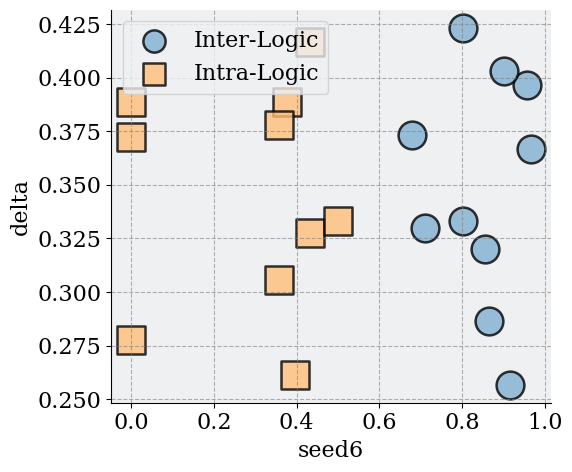

In [1]:
# scatter_plot_styled.py  ────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── 1. 读取两份矩阵 CSV (行列索引必须一致) ────────────────────────────
path_y = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/delta.csv")                   # X 轴
path_x = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/seed6.csv") # Y 轴

mx = pd.read_csv(path_x, index_col=0)
my = pd.read_csv(path_y, index_col=0)
my = my.loc[mx.index, mx.columns]                               # 行列对齐

vals_x = mx.values.flatten()
vals_y = my.values.flatten()

# ── 2. 颜色、标记与样式（复用 bar-chart palette） ────────────────────
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]
markers = ["o", "s"]            # off-diag → 圆点；diag → 方块

label0 = {0, 1, 3, 4, 8}                 # indices with label 0
labels = np.array([0 if i in label0 else 1 for i in range(len(mx))])

# ── 1.  Build boolean masks  ────────────────────────────────────────────
off_diag_mask   = ~np.eye(len(mx), dtype=bool)
diff_label_mask = labels[:, None] != labels[None, :]
# diff_label_mask = np.zeros_like(diff_label_mask, dtype=bool)
# diff_label_mask[1] = 2
nonzero_mask    = (vals_x != 0) & (vals_y != 0)        # <── new line
plot_mask = (off_diag_mask & diff_label_mask).flatten() & nonzero_mask
diag_mask  = (~off_diag_mask).flatten()          # unchanged

plot_mask_sq = (off_diag_mask & diff_label_mask) & ((mx.values != 0) & (my.values != 0))
mean_x, mean_y = [], []
for i in range(mx.shape[0]):
    # pick columns j where the (i,j) entry is an Inter-Logic point
    js = np.where(plot_mask_sq[i])[0]
    if len(js) == 0:
        continue                    # skip rows with no blue points
    mean_x.append(mx.iloc[i, js].mean())
    mean_y.append(my.iloc[i, js].mean())

# ── 2.  Scatter plot  ───────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 5))

# off-diagonal *and* different-label pairs
ax.scatter(mean_x, mean_y,
           s=400, marker="o",
           facecolor=palette[2], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Inter-Logic")


ax.scatter(vals_x[diag_mask], vals_y[diag_mask],
           s=400, marker="s",
           facecolor=palette[0], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Intra-Logic")

# ── 4. 统一风格（与柱状图相同） ──────────────────────────────────────
ax.set_xlabel(path_x.stem)
ax.set_ylabel(path_y.stem)
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=True, markerscale=0.8)
plt.tight_layout()

out = path_x.parent / "scatter.png"
plt.savefig(out, dpi=600, bbox_inches="tight")
print("✓ Saved scatter →", out)

#### average by window - macro

✓ Saved sliding-window scatter → /scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/scatter_sliding.png


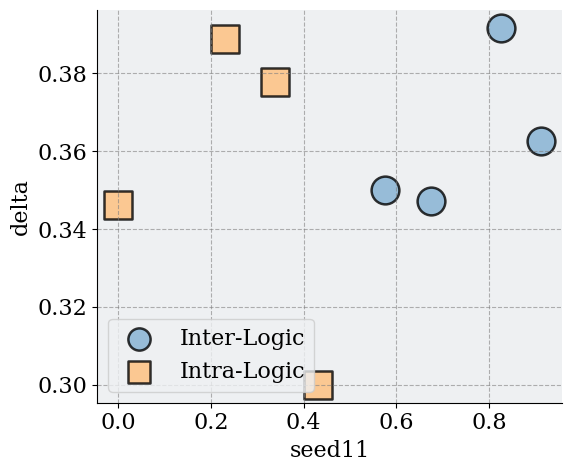

In [4]:
# scatter_plot_styled.py  ────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── 1. 读取两份矩阵 CSV (行列索引必须一致) ────────────────────────────
path_y = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/delta.csv")                   # X 轴
path_x = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/seed11.csv") # Y 轴

mx = pd.read_csv(path_x, index_col=0)
my = pd.read_csv(path_y, index_col=0)
my = my.loc[mx.index, mx.columns]                               # 行列对齐

vals_x = mx.values.flatten()
vals_y = my.values.flatten()

# ── 2. 颜色、标记与样式（复用 bar-chart palette） ────────────────────
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]
markers = ["o", "s"]            # off-diag → 圆点；diag → 方块

label0 = {0, 1, 3, 4, 8}                 # indices with label 0
labels = np.array([0 if i in label0 else 1 for i in range(len(mx))])


# ── 2.  Scatter plot  ───────────────────────────────────────────────────
# ── 0. params for sliding aggregation ───────────────────────────────────
win   = 0.1        # window width along the X axis  (edit-distance units)
step  = 0.1        # slide step                     (edit-distance units)

# helper: aggregate one mask -----------------------------------------------------
def aggregate_by_window(x, y, the_mask, win, step):
    xs, ys, sizes = [], [], []
    x_sel, y_sel  = x[the_mask], y[the_mask]
    lo, hi = x_sel.min(), x_sel.max()
    for left in np.arange(lo, hi - win + 1e-9, step):
        right = left + win
        in_win = (x_sel >= left) & (x_sel < right)
        if in_win.any():
            xs.append(x_sel[in_win].mean())           # window centre
            ys.append(y_sel[in_win].mean())           # avg  Δ-score
            sizes.append(in_win.sum())                # #points in window
    return np.array(xs), np.array(ys), np.array(sizes)

# ── 1. derive masks exactly as before ───────────────────────────────────
off_diag_mask   = ~np.eye(len(mx), dtype=bool)
diff_label_mask = labels[:, None] != labels[None, :]
nonzero_mask    = (vals_x != 0) & (vals_y != 0)
plot_mask = (off_diag_mask & diff_label_mask).flatten() & nonzero_mask
diag_mask = (~off_diag_mask).flatten()

# ── 2. aggregate ----------------------------------------------------------------
x_inter, y_inter, n_inter = aggregate_by_window(vals_x, vals_y, plot_mask, win, step)
x_intra, y_intra, n_intra = aggregate_by_window(vals_x, vals_y, diag_mask,  win, step)

# ── 3. scatter plot -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(x_inter, y_inter, s=400, marker="o",
           facecolor=palette[2], edgecolor="black", linewidth=1.8,
           alpha=0.8, label=f"Inter-Logic")

ax.scatter(x_intra, y_intra, s=400, marker="s",
           facecolor=palette[0], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Intra-Logic")

# ── 4. same styling as before ---------------------------------------------------
ax.set_xlabel(path_x.stem)
ax.set_ylabel(path_y.stem)
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=True, markerscale=0.8)
plt.tight_layout()

out = path_x.parent / "scatter_sliding.png"
plt.savefig(out, dpi=600, bbox_inches="tight")
print("✓ Saved sliding-window scatter →", out)

#### average by window - micro

✓ Saved accuracy-by-distance scatter → /scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/scatter_acc.png


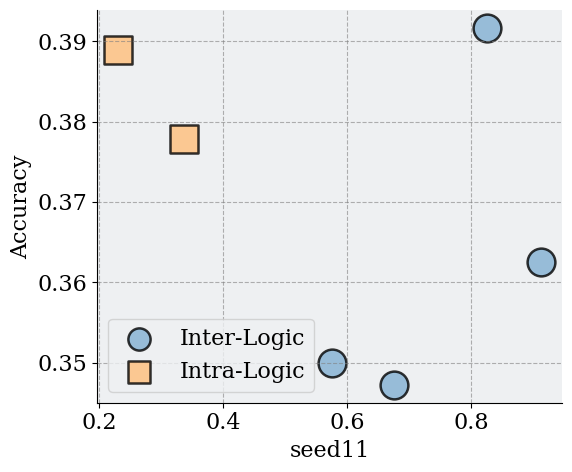

In [5]:
# scatter_plot_acc_by_distance.py  ────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── 1.  CSV paths ───────────────────────────────────────────────────────
path_dist = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/seed11.csv")   # X axis
path_tot  = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/n_total.csv")          # totals
path_cor  = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/delta_count.csv")          # correct

# ── 2.  Load & align matrices ───────────────────────────────────────────
mx     = pd.read_csv(path_dist, index_col=0)                      # distance
m_tot  = pd.read_csv(path_tot, index_col=0).loc[mx.index, mx.columns]
m_cor  = pd.read_csv(path_cor, index_col=0).loc[mx.index, mx.columns]
m_acc  = m_cor.where(m_tot != 0) / m_tot                          # accuracy

vals_x   = mx.values.flatten()          # distance for every pair
acc_vals = m_acc.values.flatten()       # accuracy  "
tot_vals = m_tot.values.flatten()       # sample count per pair

# ── 3.  Logic-group labels (same as before) ─────────────────────────────
label0 = {0, 1, 3, 4, 8}
labels = np.array([0 if i in label0 else 1 for i in range(len(mx))])

off_diag_mask   = ~np.eye(len(mx), dtype=bool)
diff_label_mask = labels[:, None] != labels[None, :]
nonzero_mask    = (vals_x != 0) & (~np.isnan(acc_vals))          # drop NaNs
mask_inter = (off_diag_mask & diff_label_mask).flatten() & nonzero_mask
mask_intra = (~off_diag_mask).flatten() & nonzero_mask

# ── 4.  Sliding-window, weighted accuracy helper ────────────────────────
def window_stats(x, acc, tot, mask, win=0.10, step=0.05):
    xs, ys, ns = [], [], []
    x_sel, acc_sel, tot_sel = x[mask], acc[mask], tot[mask]
    if len(x_sel) == 0:
        return np.array([]), np.array([]), np.array([])
    lo, hi = x_sel.min(), x_sel.max()
    for left in np.arange(lo, hi - win + 1e-9, step):
        in_win = (x_sel >= left) & (x_sel < left + win)
        if in_win.any():
            numer = (acc_sel[in_win] * tot_sel[in_win]).sum()   # Σ correct
            denom = tot_sel[in_win].sum()                       # Σ total
            xs.append(x_sel[in_win].mean())                     # window centre
            ys.append(numer / denom)                            # accuracy
            ns.append(denom)                                    # weight
    return np.array(xs), np.array(ys), np.array(ns)

win, step = 0.1, 0.1
x_inter, y_inter, n_inter = window_stats(vals_x, acc_vals, tot_vals,
                                         mask_inter, win, step)
x_intra, y_intra, n_intra = window_stats(vals_x, acc_vals, tot_vals,
                                         mask_intra, win, step)

# ── 5.  Scatter plot ────────────────────────────────────────────────────
palette = [
    (255/255, 190/255, 122/255),  # peach – Intra-Logic
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue – Inter-Logic
    (142/255, 207/255, 201/255),  # teal
]
scale = 8   # marker area ≈ scale × #examples in window

fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(x_inter, y_inter, s=400, marker="o",
           facecolor=palette[2], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Inter-Logic")
ax.scatter(x_intra, y_intra, s=400, marker="s",
           facecolor=palette[0], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Intra-Logic")

# ── 6.  Axes & layout (unchanged) ───────────────────────────────────────
ax.set_xlabel(path_dist.stem)
ax.set_ylabel("Accuracy")
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=True, markerscale=0.8)
plt.tight_layout()

out = path_dist.parent / "scatter_acc.png"
plt.savefig(out, dpi=600, bbox_inches="tight")
print("✓ Saved accuracy-by-distance scatter →", out)

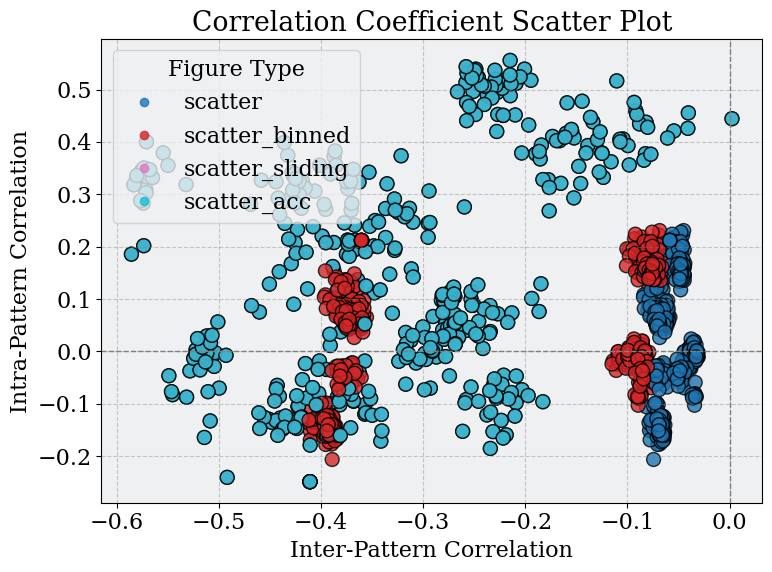

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16


# Read the CSV
df = pd.read_csv("/scratch/vjd5zr/project/ReasonEdit/results/figures/correlations_all.csv")

# Drop rows with missing inter or intra values
df_clean = df.dropna(subset=["inter", "intra"])

# Plotting
plt.figure(figsize=(8, 6))
plt.axhline(0, color='gray', linewidth=1.0, linestyle='--')
plt.axvline(0, color='gray', linewidth=1.0, linestyle='--')

scatter = plt.scatter(df_clean["inter"], df_clean["intra"],
                      c=pd.factorize(df_clean["figure"])[0],
                      cmap="tab10", alpha=0.8, edgecolor='black', s=100)

plt.xlabel("Inter-Pattern Correlation")
plt.ylabel("Intra-Pattern Correlation")
plt.title("Correlation Coefficient Scatter Plot")
plt.grid(True, linestyle="--", alpha=0.4)
# plt.xlim(-0.6, 0.6)

# Add legend with figure labels
handles, labels = scatter.legend_elements(prop="colors")
unique_figures = df_clean["figure"].unique()
plt.legend(handles, unique_figures, title="Figure Type")

plt.tight_layout()
plt.show()

/tmp/ipykernel_3034529/2165466672.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(inter_data, labels=distances, patch_artist=True, boxprops=dict(facecolor=(227/255, 207/255, 187/255), linewidth=1.4), medianprops=dict(color='black', linewidth=2), whiskerprops=dict(linewidth=1.4), capprops=dict(linewidth=1.4))
/tmp/ipykernel_3034529/2165466672.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(intra_data, labels=distances, patch_artist=True, boxprops=dict(facecolor=(190/255, 184/255, 220/255), linewidth=1.4), medianprops=dict(color='black', linewidth=2), whiskerprops=dict(linewidth=1.4), capprops=dict(linewidth=1.4))


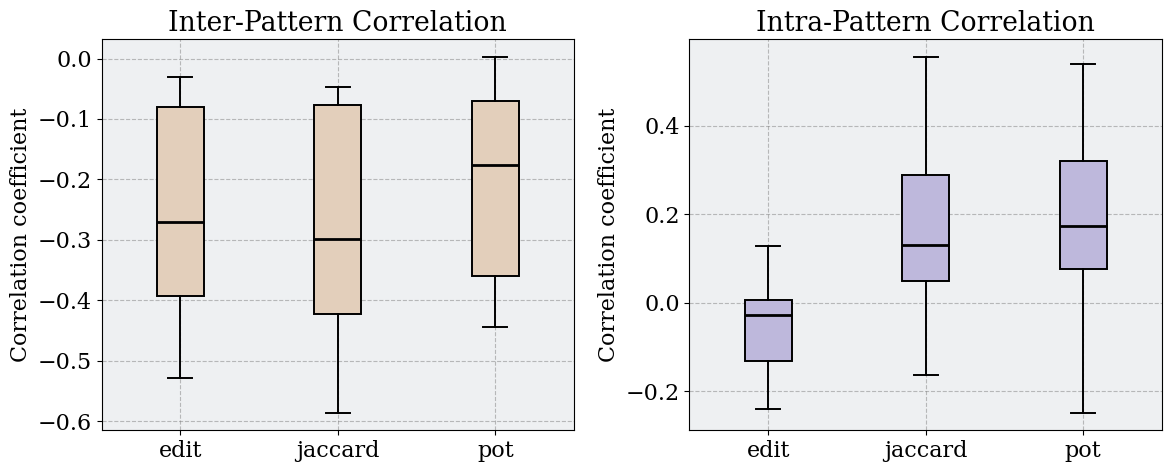

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]

df = pd.read_csv("/scratch/vjd5zr/project/ReasonEdit/results/figures/correlations_all.csv")
df = df.dropna(subset=["inter", "intra"])

distances = sorted(df["distance"].unique())
inter_data = [df[df["distance"] == d]["inter"] for d in distances]
intra_data = [df[df["distance"] == d]["intra"] for d in distances]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].boxplot(inter_data, labels=distances, patch_artist=True, boxprops=dict(facecolor=(227/255, 207/255, 187/255), linewidth=1.4), medianprops=dict(color='black', linewidth=2), whiskerprops=dict(linewidth=1.4), capprops=dict(linewidth=1.4))
axes[0].set_title("Inter-Pattern Correlation")
axes[0].set_ylabel("Correlation coefficient")

axes[1].boxplot(intra_data, labels=distances, patch_artist=True, boxprops=dict(facecolor=(190/255, 184/255, 220/255), linewidth=1.4), medianprops=dict(color='black', linewidth=2), whiskerprops=dict(linewidth=1.4), capprops=dict(linewidth=1.4))
axes[1].set_title("Intra-Pattern Correlation")
axes[1].set_ylabel("Correlation coefficient")

plt.tight_layout()
plt.show()


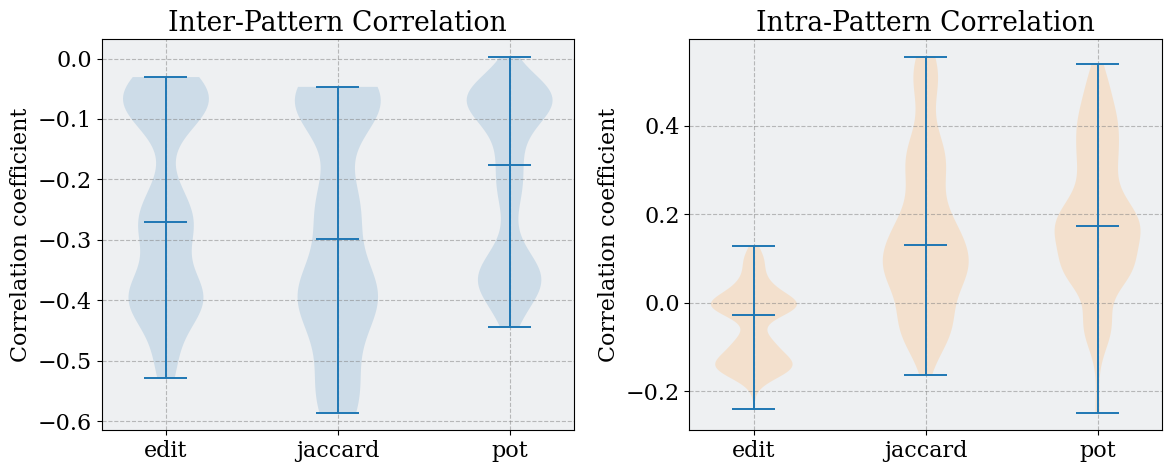

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]

df = pd.read_csv("/scratch/vjd5zr/project/ReasonEdit/results/figures/correlations_all.csv")
df = df.dropna(subset=["inter", "intra"])

distances = sorted(df["distance"].unique())
inter_data = [df[df["distance"] == d]["inter"] for d in distances]
intra_data = [df[df["distance"] == d]["intra"] for d in distances]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# color
axes[0].violinplot(inter_data, showmedians=True, showextrema=True)
axes[0].set_xticks(range(1, len(distances) + 1))
axes[0].set_xticklabels(distances)
axes[0].set_title("Inter-Pattern Correlation")
axes[0].set_ylabel("Correlation coefficient")
for pc in axes[0].collections:
    pc.set_facecolor((130/255, 176/255, 210/255))
    # pc.set_edgecolor('black')
    pc.set_linewidth(1.4)

axes[1].violinplot(intra_data, showmedians=True, showextrema=True)
axes[1].set_xticks(range(1, len(distances) + 1))
axes[1].set_xticklabels(distances)
axes[1].set_title("Intra-Pattern Correlation")
axes[1].set_ylabel("Correlation coefficient")
for pc in axes[1].collections:
    pc.set_facecolor((255/255, 190/255, 122/255))
    # pc.set_edgecolor('black')
    pc.set_linewidth(1.4)

plt.tight_layout()
plt.show()

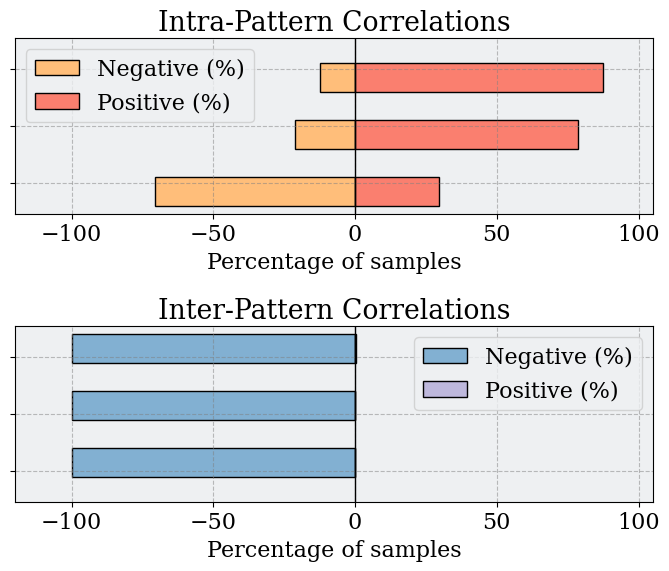

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]

df = pd.read_csv("/scratch/vjd5zr/project/ReasonEdit/results/figures/correlations_all.csv")
df = df.dropna(subset=["inter", "intra"])

# Compute ratios for each distance
records = []
for d in sorted(df["distance"].unique()):
    sub = df[df["distance"] == d]
    intra_vals = sub["intra"]
    inter_vals = sub["inter"]
    
    total_intra = len(intra_vals)
    total_inter = len(inter_vals)
    
    intra_neg = (intra_vals < 0).sum() / total_intra * 100
    intra_pos = (intra_vals >= 0).sum() / total_intra * 100
    
    inter_neg = (inter_vals < 0).sum() / total_inter * 100
    inter_pos = (inter_vals >= 0).sum() / total_inter * 100
    
    records.append((d, -intra_neg, intra_pos, -inter_neg, inter_pos))

distances = [r[0] for r in records]
intra_negs = [r[1] for r in records]
intra_poss = [r[2] for r in records]
inter_negs = [r[3] for r in records]
inter_poss = [r[4] for r in records]

y_pos = np.arange(len(distances))

fig, axes = plt.subplots(2, 1, figsize=(7, 6), sharey=True)

# Intra subplot
axes[0].axvline(0, color='black', linewidth=1)
axes[0].barh(y_pos - 0.15, intra_negs, height=0.5, color=(255/255, 190/255, 122/255), edgecolor='black', label="Negative (%)")
axes[0].barh(y_pos - 0.15, intra_poss, height=0.5, color=(250/255, 127/255, 111/255), edgecolor='black', label="Positive (%)")
axes[0].set_title("Intra-Pattern Correlations")
axes[0].set_xlabel("Percentage of samples")
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(distances)
axes[0].set_xlim(min(intra_negs + inter_negs) * 1.2, max(intra_poss + inter_poss) * 1.2)
axes[0].legend()

# Inter subplot
axes[1].axvline(0, color='black', linewidth=1)
axes[1].barh(y_pos + 0.15, inter_negs, height=0.5, color=(130/255, 176/255, 210/255), edgecolor='black', label="Negative (%)")
axes[1].barh(y_pos + 0.15, inter_poss, height=0.5, color=(190/255, 184/255, 220/255), edgecolor='black', label="Positive (%)")
axes[1].set_title("Inter-Pattern Correlations")
axes[1].set_xlabel("Percentage of samples")
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels([])  # shared y-axis on left subplot
axes[1].set_xlim(min(intra_negs + inter_negs) * 1.2, max(intra_poss + inter_poss) * 1.2)
axes[1].legend(loc="upper right")

plt.tight_layout()
plt.show()